
# Project: Medical Appointment No Shows
### Abayomi Koyejo, April 2020
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> A person makes a doctor appointment, receives all the instructions and does not show up. Who or what is to blame? In this dataset we have information from 100k medical appointments in Brazil and we would be analyzing it to understand the nature of the problem and answer the pertinent question whether or not a patient will show up for his/her appointment based on the combination of several factors. 

In [120]:
# Importing all packages needed for the project

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import arrow


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [121]:
# Loading data
df = pd.read_csv("brazil.csv")

#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The information for the dataset shows a total of 110527 entries. The dataset contains 14 columns and no data point is missing since each of the column has the maximum number of entry. The data types vary between float, int and object type. Next we will consider the column entry and what they represent. Let's check the first five entry by printing the head of the dataframe

In [122]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [123]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


A number of characteristics about the patients are included in each row such as. These characteristics and explanation is providied below:
- PatientId: Identification of a patient
- AppointmentID:  The unique number for each appointment
- Gender: Male or Female
- ScheduledDay: The appointed day for visiting the doctor
- AppointmentDay: The day the call was received and apointment scheduled
- Age: The patient's age
- Neighbourhood: Where the appointment takes place.
- Scholarship: True of False . More information avalable on the [Bolsa Família Page](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) on Wikepedia
- Hipertension: True or False
- Diabetes: True or False
- Alcoholism: True or False
- Handcap: True or False
- SMS_received: 1 or more messages sent to the patient.
- No-show: No or yes. No signify the patient was present at the appointment while yes signify no-show
- ‘ScheduledDay’ tells us on what day the patient set up their appointment. 
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


### Data Cleaning

> df.info() used above shows a total of 110527 entries. The data entries for each column match the total number of entries showing there is no missing data in the dataset. The date format is stored as a string in the data set and this will be processed into datetime format and split into two separate column.<br> Next the PatientID, AppointmentID and AppointmentDay colum will be dropped. The reason being that they are unique number for each automatically generated by the computer and have very little value for this specific analysis. The appointment day is simply the day the patient called in and has little to sate about whether they will attend since at the moment of calling they were planning to see the doctor. 

In [124]:
#convert to datetime
df["ScheduledDay"]= pd.to_datetime(df['ScheduledDay'])
df["AppointmentDay"]= pd.to_datetime(df["AppointmentDay"])

In [125]:
# Replace noshow with Absent and Present with present representing showing up at the appointment
df = df.replace({'No-show': {'Yes': "Absent", 'No': "Present"}})
# Rename column No-show to Appointment
df=df.rename(columns = {'No-show':'Appointment'})

In [126]:
# To many individual age. Define age catergory
category = pd.cut(df.Age,bins=[0,2,17,65,115],labels=['Baby','Child','Adult','Elderly'])
df.insert(5,'Age Group',category)

> The difference between the Schedule day and day of appointment is the Waiting Time. The assumption here is that more serious cases emergency
cases will have lesser waiting time and vice versa. We create a new colume for wait time

In [127]:
df["Wait"] = (df["ScheduledDay"] - df["AppointmentDay"]).abs()
df["WaitDay"]  = df["Wait"].dt.days

In [128]:
#categories for the wait time
categories = pd.Series(['Immediate: 0-2', 'One Week: 4-7', 'Two Weeks: 8-14', 'One Month: 15-31', 
                        '2 Months or more'])
# pasting the categories to WaitDay
df["WaitDay"] = pd.cut(df.WaitDay, bins = [0,3,7,15,30,1000], labels=categories, include_lowest=True)

In [129]:
#drop irrelevant columns and values 
df.drop(df.index[df['Age'] == -1], inplace = True) # Negative age in dataset removed
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay', 'Wait' ],axis=1,inplace=True)


In [130]:
df.head(10)

,Gender,Age Group,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment,WaitDay
0,F,Adult,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,Immediate: 0-2
1,M,Adult,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,Immediate: 0-2
2,F,Adult,62,MATA DA PRAIA,0,0,0,0,0,0,Present,Immediate: 0-2
3,F,Child,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,Immediate: 0-2
4,F,Adult,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,Immediate: 0-2
5,F,Elderly,76,REPÚBLICA,0,1,0,0,0,0,Present,Immediate: 0-2
6,F,Adult,23,GOIABEIRAS,0,0,0,0,0,0,Absent,Immediate: 0-2
7,F,Adult,39,GOIABEIRAS,0,0,0,0,0,0,Absent,Immediate: 0-2
8,F,Adult,21,ANDORINHAS,0,0,0,0,0,0,Present,Immediate: 0-2
9,F,Adult,19,CONQUISTA,0,0,0,0,0,0,Present,Immediate: 0-2


<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data has been cleaned, we go into exploratory analysis. First we will have an histogram of all the colum in the dataset to see a visual representation of their data

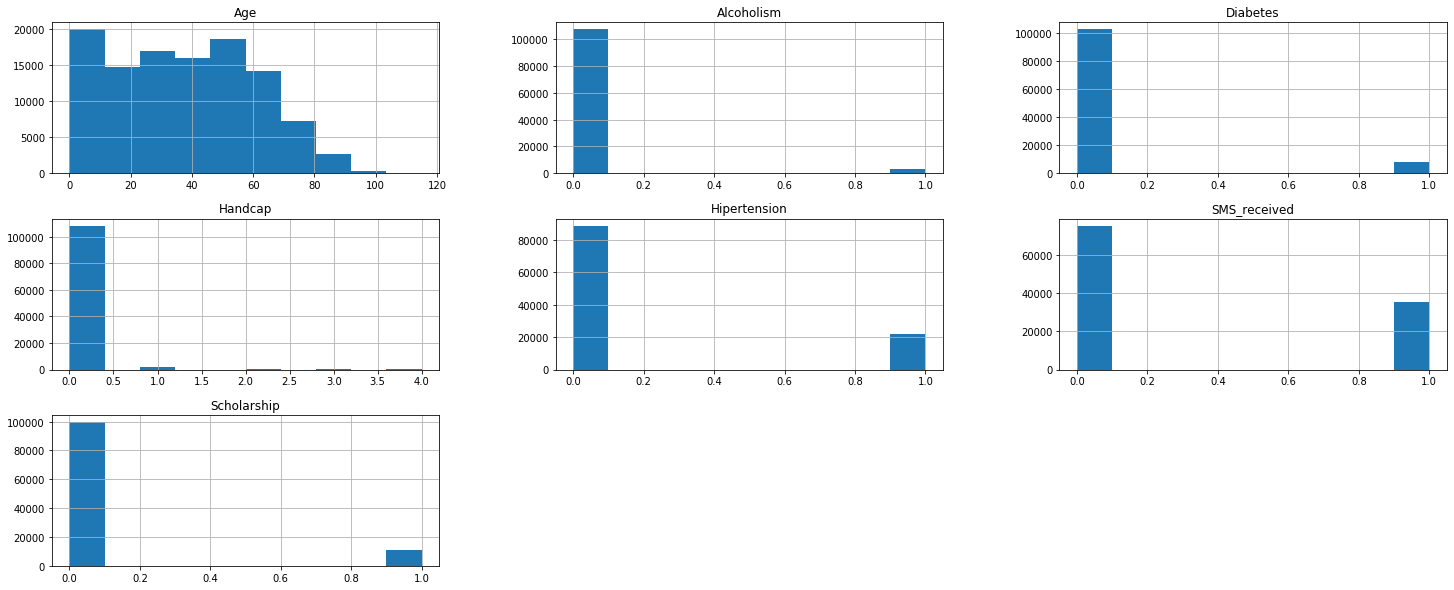

In [131]:
#plotting histogram of columns
df.hist(figsize =(25,10));

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


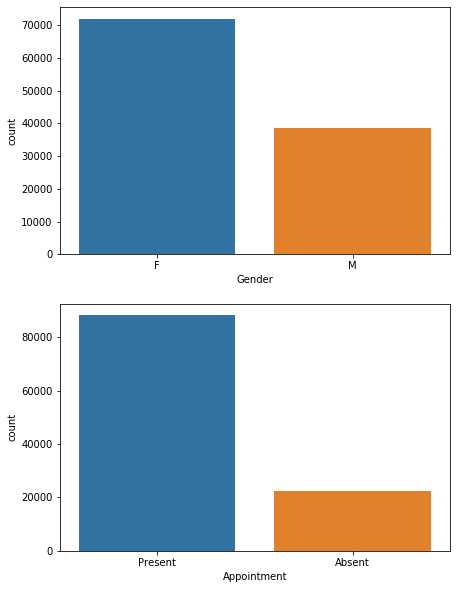

In [132]:
# As seen above some of the colums were not plotted due to the fact they contain catergorical variables unlike numeric. We will plot them using seaborn
fig, ax =plt.subplots(2, figsize=(7,10))

sns.countplot(df['Gender'], ax=ax[0])
sns.countplot(df['Appointment'], ax=ax[1])
fig.show();

> As seen from the preliminary observation, the Age, Gender, SMS-received and Neighbourhood column have very good prospects for further analysis. The reason is quite simple. The values are distributed over the different options in the column. For other columns for example Alcohol consumption, only a very small amount of people consume out of the total which will not tell us much. For further analysis to determine whether a patient is present at the appointment of not, the gender, neighbourhood and age column is selected.


### Research Question 1 (who is more likely to miss the appointment between males and females?)

> As shown below, there is no direct correlation between males and females on who is most likely to miss the appointment. Both parties were both present and absent in equal proportions according to their number in the data set. Since the dataset contains more women than men, it is natural that the number of absentiees shows more female. The proportion analysis show the same level of attendance by both parties

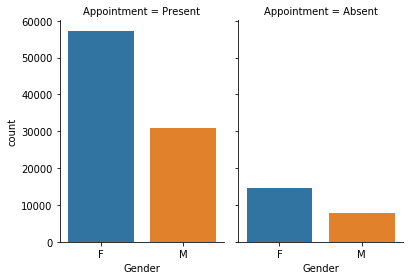

In [133]:
sns.catplot(x="Gender", col="Appointment",
                data=df, kind="count",
                height=4, aspect=.7);


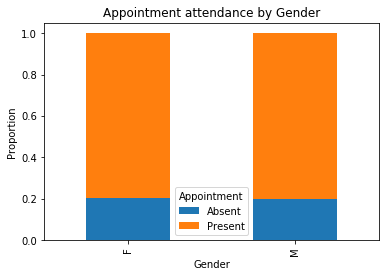

In [134]:
#Since the number of counts for each dataset are different let's look at the proportions
pd.crosstab(index=df["Gender"], 
            columns=df["Appointment"], normalize = 'index').plot(kind='bar', 
                                     stacked = True);
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Appointment attendance by Gender')
plt.legend;

> Going forward we check the effect of a third component "Age group". As seen, the proportion is again the same, but we can say young babies and the elderly are more likely to be present at the appointment as compared with Children and Adults. 

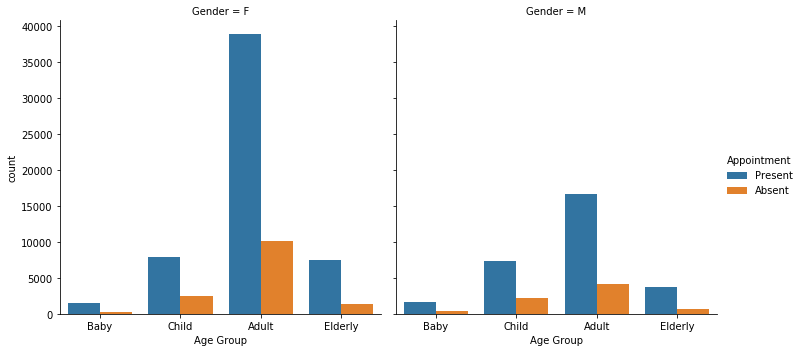

In [135]:
sns.catplot(col="Gender", hue="Appointment", x="Age Group", kind="count", data=df);

> Next we combine with SMS received. There is no difference in attendance between genders when they received an SMS or not. Tje absent rate in both classes is almost similar regardless of whether the males or females received an SMS.

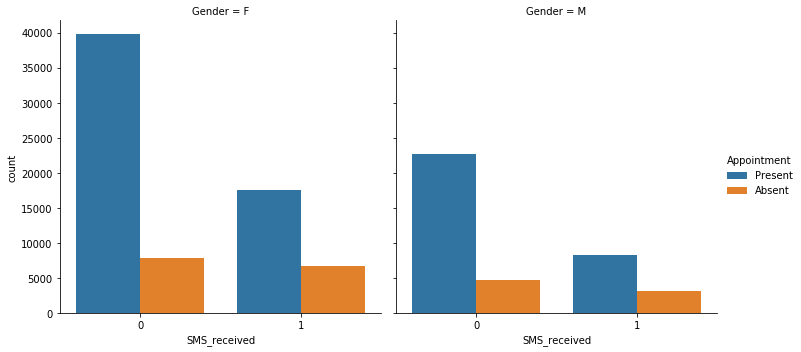

In [136]:
sns.catplot(col="Gender", hue="Appointment", x="SMS_received", kind="count", data=df);

> By this we can conclude that for this dataset the effect of gender is not clearly visible and more information will be required to explore it futher which are not really present in the current dataset. At this time, based on gender alone we cannot predict if a person will be present or absent at the appointment as they are both likely to be present or absent equally

### Research Question 2  (Is age a factor in determining who is present at the appointment?)

> Here we see a lower rate of absentism amongst baby and the elderly as compared to the adults and children. However, the values are very close to one another

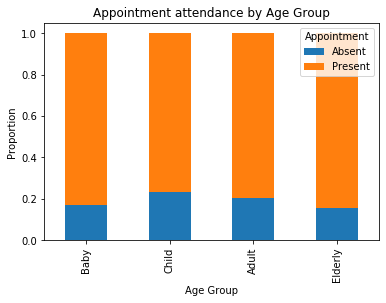

In [137]:
# plot of proportion Age group data
pd.crosstab(index=df["Age Group"], 
            columns=df["Appointment"], normalize = 'index').plot(kind='bar', 
                                     stacked = True);
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.title('Appointment attendance by Age Group')
plt.legend;

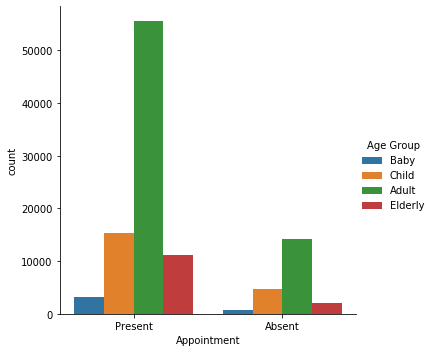

In [138]:
sns.catplot(x="Appointment", hue="Age Group", kind="count", data=df);

### Research Question 3  (How does the wait time affect prescence?)

> The wait time in day is shown below. As seen the more the weight time, the greater the tendency of being absent. The waait time termed immediately can lead us to think of energerncy situations where appointment are scheduled almost immediately and it stands to reason the patient will tend to be present in such cases.

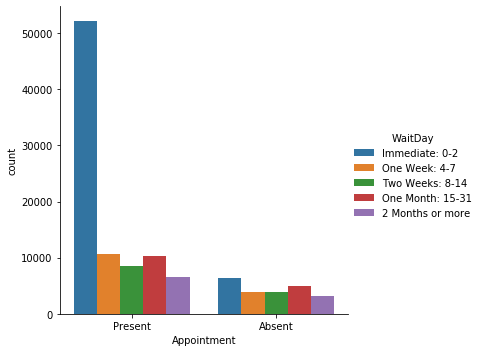

In [139]:
sns.catplot(x="Appointment", hue="WaitDay", kind="count", data=df);

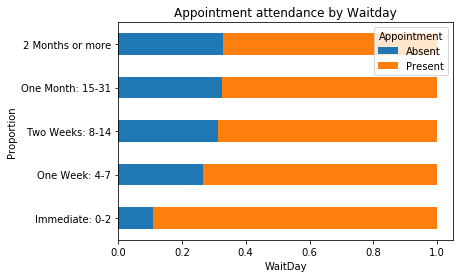

In [140]:
pd.crosstab(index=df["WaitDay"], 
            columns=df["Appointment"], normalize = 'index').plot(kind='barh', 
                                     stacked = True);
plt.xlabel('WaitDay')
plt.ylabel('Proportion')
plt.title('Appointment attendance by Waitday')
plt.legend;

<a id='conclusions'></a>
## Conclusions
> In conclusion the following findings were made during the course of the project based on the available data:
- The gender alone has no effect on determining if the patient will turn up for the appointment
- Far extreme age groups such as little babies and the elderly are more likely to show up for their appointment when compared to the others
- The lower the wait time, the higher the chances of the patient being present at the appointment
- There were some limitations during the project whiich include the unavailability cross refence data, regional insights into data collection, inaccurate data such as age having a negative value which show a problem with data collection. In order to be able to give a better prediction, tools of machine learning should be applied. 